In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_boston
from matplotlib import cm
from sklearn.model_selection import train_test_split
from numpy.linalg import inv
import pandas as pd
from mpl_toolkits import mplot3d

# Load the Boston Housing Dataset
features, label = load_boston(return_X_y=True)

In [8]:

X = features[:, [6, 11]]
Y = label

In [9]:
class AdalineRegressor:
    def __init__(self):
        pass
    
    def fit(self, X_train, Y_train):
        self.w = np.matmul(inv(np.matmul(X_train.T, X_train)), np.matmul(X_train.T, Y_train))
        
    def predict(self, X_test):
        Y_predic = np.matmul(X_test, self.w)
        return Y_predic
    
    def evaluation(self, X_test, Y_test):
        Y_predic = np.matmul(X_test, self.w)
        subtract = np.abs(Y_test - Y_predic)
        average = np.mean(subtract)
        return average
    
    def evaluation_mse(self, X_test, Y_test):
        Y_predic = np.matmul(X_test, self.w)
        mse = (np.square(Y_test - Y_predic)).mean()
        return mse        
    
    def evaluation_mae(self, X_test, Y_test):
        Y_predic = np.matmul(X_test, self.w)
        mae = mae = np.absolute(np.subtract(Y_test, Y_predic)).mean()
        return mae

In [10]:
model = AdalineRegressor()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25,random_state=4)

model.fit(X_train, Y_train)
y_predic = model.predict(X)
w = model.w
print(w)
mae = model.evaluation_mae(X_test, Y_test)
print('mean squared error is', mae)
mse = model.evaluation_mse(X_test, Y_test)
print('mean absolute error is', mse)

[-0.00453815  0.06087811]
mean squared error is 7.289730245968459
mean absolute error is 97.53408531630133


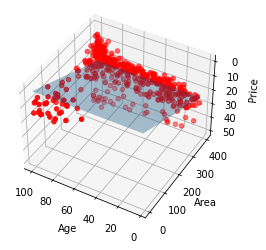

In [11]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

x_range = np.arange(X[:,0].min(), X[:,0].max())
y_range = np.arange(X[:,1].min(), X[:,1].max())

x, y = np.meshgrid(x_range, y_range)

z = x * w[0] + y * w[1]

ax.plot_surface(x, y, z, rstride=1, cstride=1, alpha = 0.4)

ax.scatter(X[:,0], X[:,1], Y, c='r', marker='o')

ax.set_xlabel('Age')
ax.set_ylabel('Area')
ax.set_zlabel('Price')
ax.view_init(-140, 60)

plt.show()